In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn import linear_model


#visualization setup
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv('main_dataframe.csv')

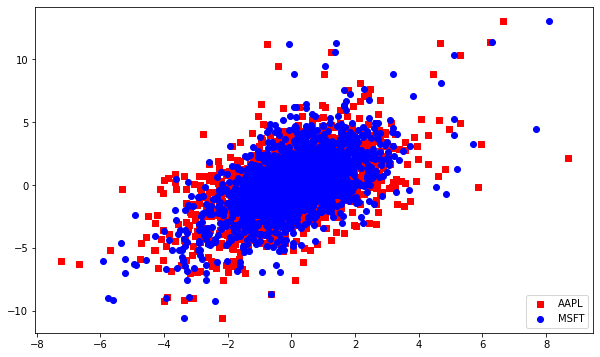

In [3]:
plt.scatter(x=df['AAPL Daily change'],y=df['NVDA Daily change'],c='r',marker='s',label='AAPL')
plt.scatter(x=df['MSFT Daily change'],y=df['NVDA Daily change'],c='b',marker='o',label='MSFT')

plt.legend(numpoints=2,loc=4)
plt.show()

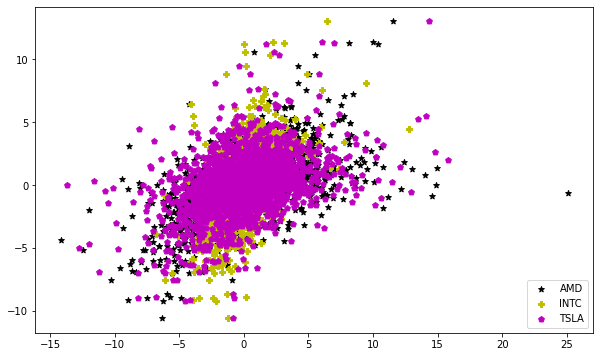

In [4]:
plt.scatter(x=df['AMD Daily change'],y=df['NVDA Daily change'],c='k',marker='*',label='AMD')
plt.scatter(x=df['INTC Daily change'],y=df['NVDA Daily change'],c='y',marker='P',label='INTC')
plt.scatter(x=df['TSLA Daily change'],y=df['NVDA Daily change'],c='m',marker='p',label='TSLA')

plt.legend(numpoints=2,loc=4)
plt.show()

In [5]:
tdf = pd.DataFrame(df, columns = ['NVDA Close'])
tdf['Predicted Close'] = ((df['NVDA Open']*5+df['AAPL Daily change']*df['NVDA Open']/100+df['AMD Daily change']*df['NVDA Open']/100+df['INTC Daily change']*df['NVDA Open']/100+df['MSFT Daily change']*df['NVDA Open']/100+df['TSLA Daily change']*df['NVDA Open']/100)/5) 
tdf
tdf.drop(tdf.index[1000:2548], inplace=True)              


In [6]:
m=linear_model.LinearRegression().fit(tdf.iloc[:,1:2],tdf.iloc[:,0:1])


C:\Users\vovik\AppData\Local\Temp/ipykernel_7684/764479585.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(tdf['Predicted Close'],m.predict(tdf.iloc[:,1:2]),'k',color='blue',linewidth=3)


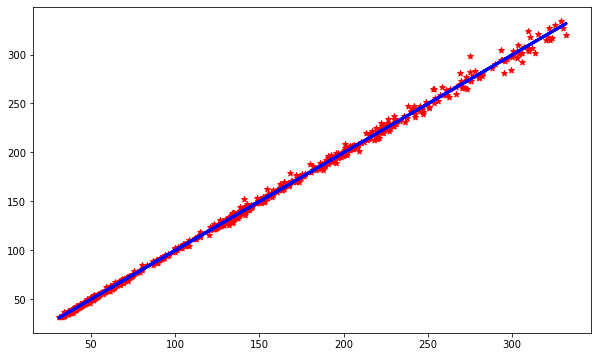

In [7]:
plt.scatter(x=tdf['Predicted Close'],y=tdf['NVDA Close'],c='r',marker='*',label='Index')
plt.plot(tdf['Predicted Close'],m.predict(tdf.iloc[:,1:2]),'k',color='blue',linewidth=3)
plt.show()

In [8]:
print("b1:",m.coef_)
print("b0:",m.intercept_)

b1: [[0.99810569]]
b0: [0.15957924]


In [9]:
def sse(Y, Y_HAT):  
    sse = sum([(y - y_hat)**2 for y,y_hat in zip(Y, Y_HAT)])
    return sse

SSE = sse(tdf['NVDA Close'].tolist(),m.predict(tdf.iloc[:,1:2]).flatten())

print(SSE)

6600.587361599908


In [10]:
mean_squared_error(tdf['NVDA Close'].tolist(),m.predict(tdf.iloc[:,1:2]).flatten())*len(tdf['NVDA Close'].tolist())

6600.587361599897

In [11]:
r2_score(tdf['NVDA Close'].tolist(),m.predict(tdf.iloc[:,1:2]).flatten())

0.9989069957908321